## Project : Fake News Prediction  using Logistic Regression 

### Work Flow : 

1. Read Data
2. Data Preprocessing  ( Text Processing )
3. Train the Model
4. Evaluate the Model
5. Build a Predecting System



###  Note : 1 : Fake News | 0 : Real News 
#### since it is Fake news Prediciton  

#### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import the train data 

In [2]:
dataset = pd.read_csv("train.csv")
print( " Data Imported Successfully!!!!!!!!!!!!")

 Data Imported Successfully!!!!!!!!!!!!


## 1. Read Data 

1. Shape
2. Duplicates and Null Values
3. Descriptive Statistics


In [3]:
dataset.shape

(20800, 5)

In [4]:
dataset.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
dataset["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

<AxesSubplot:>

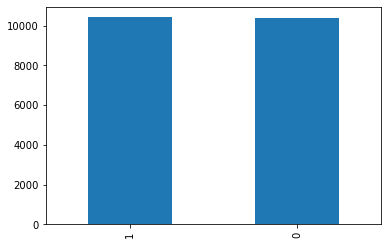

In [6]:
dataset["label"].value_counts().plot(kind = 'bar')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
dataset = dataset.fillna("")

In [10]:
dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
dataset.shape

(20800, 5)

In [12]:
dataset.duplicated().sum()

0

In [13]:
dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


## 2. Data Preprocessing 

In [14]:
dataset["content"] = dataset["author"] + " " + dataset["title"]

In [15]:
dataset.head(2)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."


### Import Text Processing libraries 



In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#### Stopwords list  consists in an English sentences

In [17]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
ps =PorterStemmer()

### Process of Text preprocessing :
#### lowercase -> tokensization -> remove stop words and punctuations -> stemming

In [19]:
def stemming(content):
    stem_ct = re.sub("[^a-zA-Z]" , " " ,content )
    stem_ct = stem_ct.lower()
    stem_ct  = stem_ct.split()
    stem_ct = [ps.stem(word) for word in stem_ct if not word in stopwords.words("english")]
    stem_ct = " ".join(stem_ct)
    
    return stem_ct

In [20]:
dataset["content"] = dataset["content"].apply(stemming)

In [21]:
print(dataset["content"])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [22]:
dataset.drop(["title" , "author" ,"text"] , axis = 1 ,inplace= True)

In [23]:
dataset.head(2)

,id,label,content
0,0,1,darrel lucu hous dem aid even see comey letter...
1,1,0,daniel j flynn flynn hillari clinton big woman...


In [24]:
X = dataset["content"].values
y = dataset["label"].values

In [25]:
X.shape , y.shape

((20800,), (20800,))

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfid = TfidfVectorizer()
X = tfid.fit_transform(X)

## 3. Train the Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
X_train , X_test ,y_train , y_test = train_test_split ( X ,y ,test_size= 0.2, stratify=y,random_state=2)

#### Small Note : Stratification is an inportant parameter since above we have noticed the dataset consists 50-50 % approx real and fake news , so it may be possible the high amount of real news went in to train set and print every news "real" during prediction or vice versa , because  Stratified sampling is a sampling technique where the samples are selected in the same proportion.

In [30]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((16640, 17128), (4160, 17128), (16640,), (4160,))

In [31]:
lr = LogisticRegression()
lr.fit(X_train ,y_train)

LogisticRegression()

In [32]:
pred = lr.predict(X_test)

In [33]:
pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## 4. Evaluate the Models

In [34]:
from sklearn.metrics import accuracy_score ,confusion_matrix

In [35]:
print("Accuracy of the model is : " , accuracy_score(y_test ,pred))

Accuracy of the model is :  0.9790865384615385


In [36]:
print(" Confusion Matrix : \n" , confusion_matrix(y_test ,pred) )

 Confusion Matrix : 
 [[2004   73]
 [  14 2069]]


## Build a Predicitve System

In [37]:
X_new = X_test[500]   # [3] : Real | [500] : Fake

prediction = lr.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
print ( " Congratulations !!!!!!!!!!!!!!!!! you have sucessfully completed this task")